In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importng the dataset
dataset=pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()
#needed when doing real time data mining. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

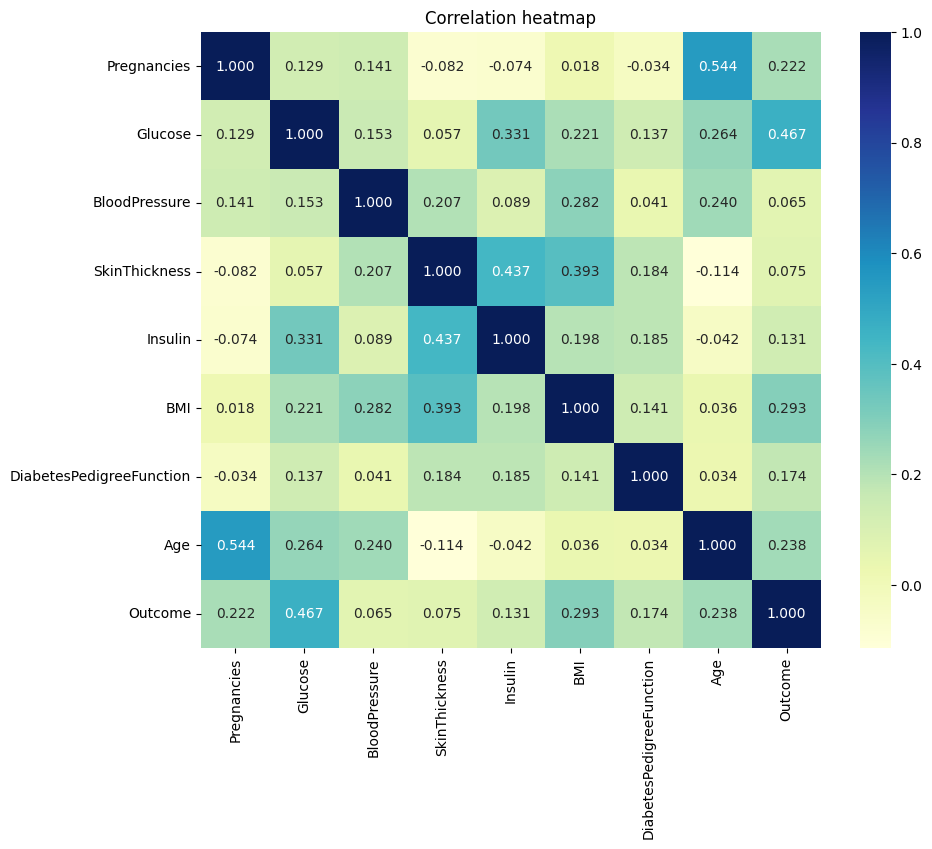

In [7]:
#correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation heatmap")

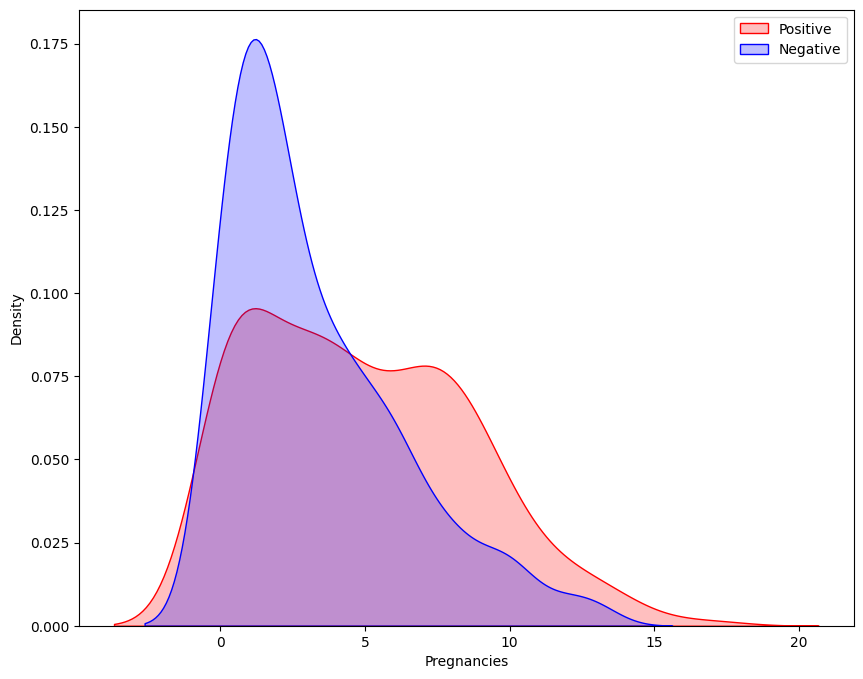

In [9]:
#exploring pregnancy and target variables
plt.figure(figsize=(10,8))
#plotting density based graph of pregnancy and target variables
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

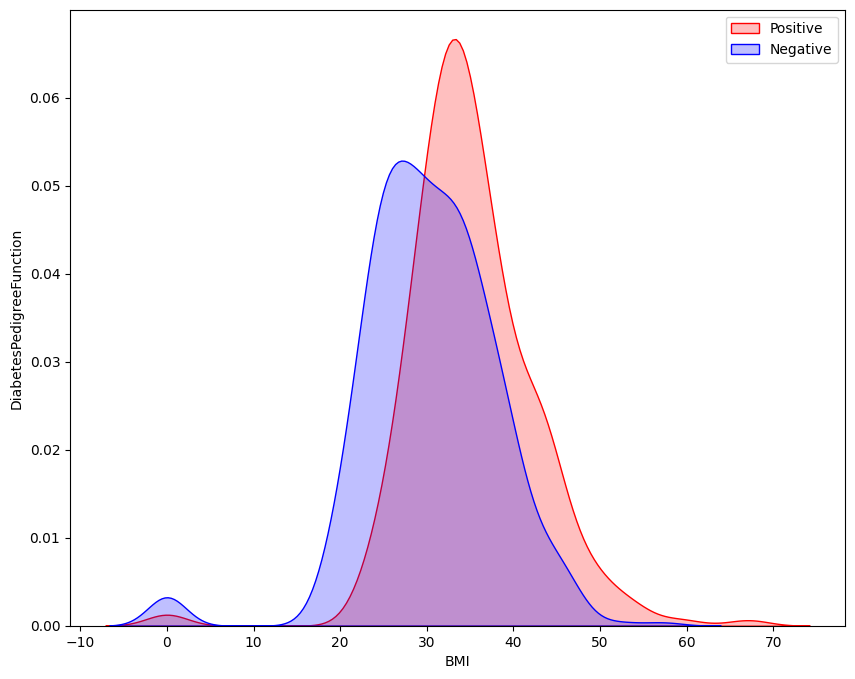

In [28]:
plt.figure(figsize=(10,8))
#plotting density based graph of BMI and target variables
kde=sns.kdeplot(dataset["BMI"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["BMI"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("BMI")
kde.set_ylabel("DiabetesPedigreeFunction")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

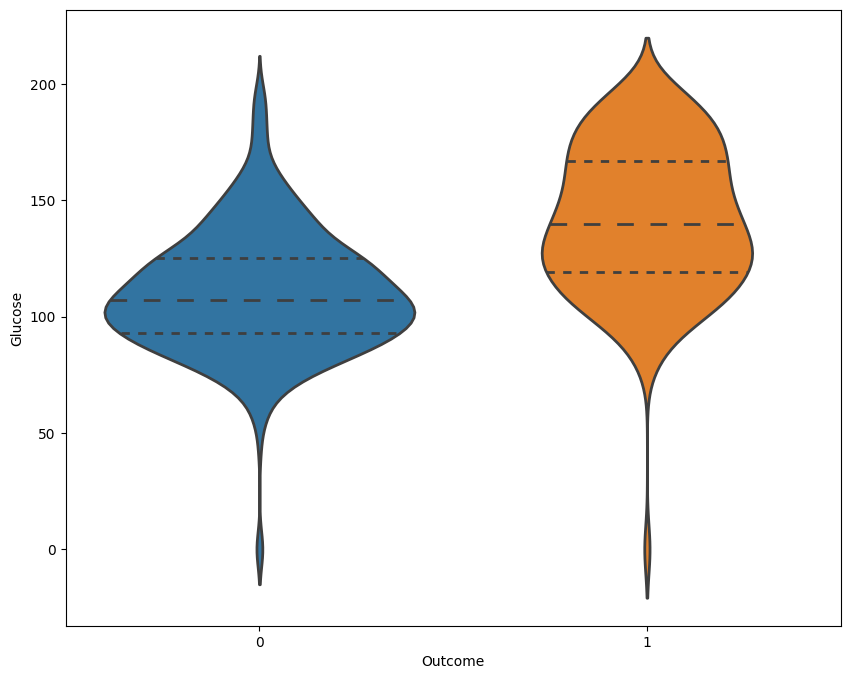

In [10]:
#for glucode target variable
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")

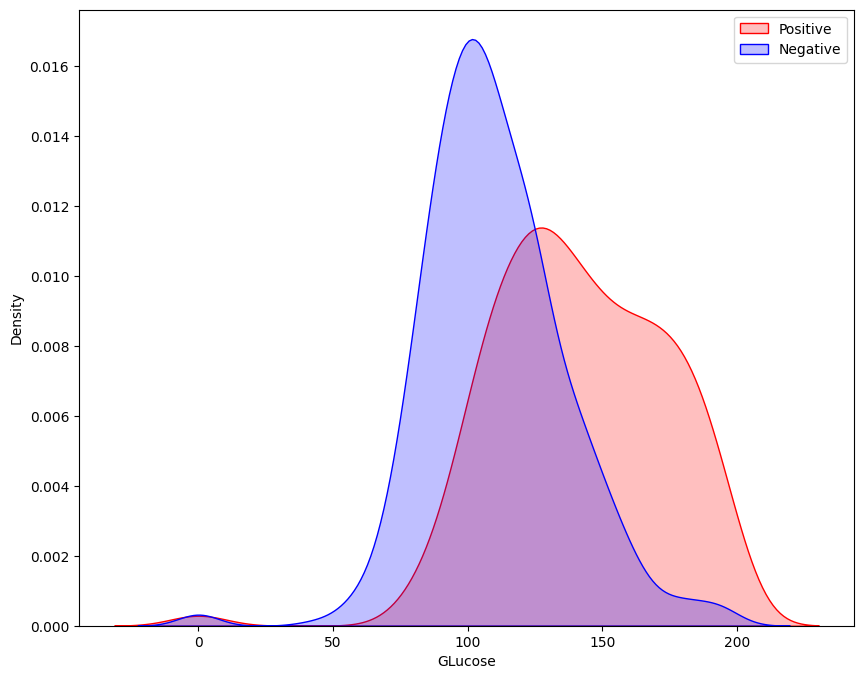

In [11]:
#exploring glucose and target variables
plt.figure(figsize=(10,8))
#plotting density based graph of glucose and target variables
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("GLucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [12]:
#replacing 0 values with the mean/median of the respective feature
#glucose
dataset["Glucose"]=dataset["Glucose"].replace("0",dataset["Glucose"].median())
#blood pressure
dataset["BloodPressure"]=dataset["BloodPressure"].replace("0",dataset["BloodPressure"].median())
#BMI
dataset["BMI"]=dataset["BMI"].replace("0",dataset["BMI"].mean())
#SkinThickness
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
#Insulin
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [13]:
#splitting the dependent and independent variables
x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
#splitting the dataet into training and testinf dataset
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [16]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #check accuracy score
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

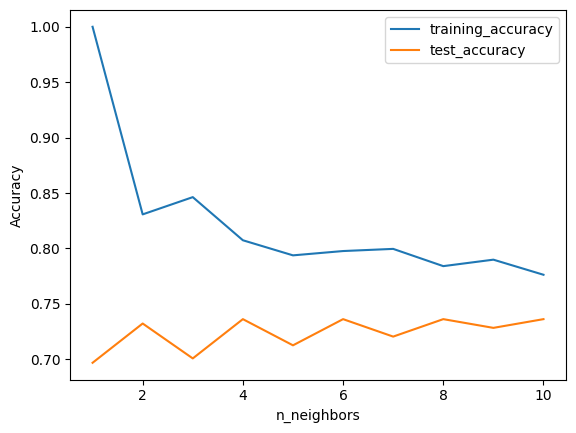

In [17]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [18]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),"training_accuracy")
print(knn.score(X_test,y_test),"test accuracy")

0.7898832684824902 training_accuracy
0.7283464566929134 test accuracy


In [19]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,max_depth=3)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train),":training_accuracy")
print(dt.score(X_test,y_test),":test accuracy")


0.77431906614786 :training_accuracy
0.6929133858267716 :test accuracy


In [20]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train),":training_accuracy")
print(mlp.score(X_test,y_test),":test accuracy")

0.7568093385214008 :training_accuracy
0.7165354330708661 :test accuracy


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(X_train)
x_test_scaled=sc.fit_transform(X_test)
mlp1=MLPClassifier(random_state=42)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),":training_accuracy")
print(mlp1.score(x_test_scaled,y_test),":test accuracy")

0.8326848249027238 :training_accuracy
0.7401574803149606 :test accuracy


c:\Users\kartik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
